In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-18 13:54:06.402995


# Pivot-taulukot

Pivot-taulukoita luon **pivot_table**-funktiolla. Keskeisiä parametreja ovat

* **values** - laskettavat muuttujat
* **index** - rivimuuttujat
* **columns** - sarakemuuttujat
* **aggfunc** - arvojen laskentamenetelmät (oletuksena pivot-taulukkoon lasketaan keskiarvot)


Taitavalla **groupby()**-funktion käytöllä voin tehdä samoja asioita kuin pivot_table-funktiolla. Usein pivot_table tarjoaa kuitenkin helpomman tavan.

Jos lasket lukumääriä, niin pivot_table-funktion sijasta kannattaa käyttää **crosstab**-funktioata, joka laskee oletuksena lukumääriä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

In [3]:
# Avaan datan, jossa maiden onnellisuuspisteitä eri vuosina
df = pd.read_excel('https://taanila.fi/happy.xlsx')
df

,Region,Country,Year,Score
0,Western Europe,Switzerland,2015,7.587
1,Western Europe,Iceland,2015,7.561
2,Western Europe,Denmark,2015,7.527
3,Western Europe,Norway,2015,7.522
4,North America,Canada,2015,7.427
...,...,...,...,...
845,NaN,"Hong Kong S.A.R., China",2019,NaN
846,NaN,Trinidad & Tobago,2019,6.192
847,NaN,Northern Cyprus,2019,5.718
848,NaN,North Macedonia,2019,5.274


In [4]:
# Pivot-taulukko, jonka arvoina onnellisuuspistemäärien keskiarvot ja riveillä vuodet
df.pivot_table(values='Score', index='Year')

,Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096


In [5]:
# Rajoitun vuoteen 2019 ja otan riveille alueet 
# Järjestän keskiarvon mukaiseen laskevaan järjestykseen
df[df['Year']==2019].pivot_table(values='Score', index='Region').sort_values(by='Score', ascending=False)

,Score
Region,
Australia and New Zealand,7.267500
North America,7.085000
Western Europe,6.898400
Latin America and Caribbean,5.942550
Eastern Asia,5.688833
Central and Eastern Europe,5.571786
Southeastern Asia,5.273667
Middle East and Northern Africa,5.237000
Southern Asia,4.526857


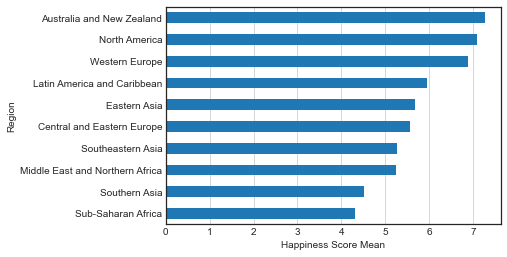

In [6]:
# Sama vaakapylväinä
df[df['Year']==2019].pivot_table(values='Score', index='Region').sort_values(by='Score').plot.barh(legend=False)

plt.xlabel('Happiness Score Mean')
plt.grid(axis='x')

In [7]:
# Riveille voin ottaa useampiakin muuttujia
df.pivot_table(values='Score', index=['Region', 'Year'])

Score
Region                          Year          
Australia and New Zealand       2015  7.285000
                                2016  7.323500
                                2017  7.299000
                                2018  7.298000
                                2019  7.267500
Central and Eastern Europe      2015  5.332931
                                2016  5.370690
                                2017  5.409931
                                2018  5.463966
                                2019  5.571786
Eastern Asia                    2015  5.626167
                                2016  5.624167
                                2017  5.496500
                                2018  5.672000
                                2019  5.688833
Latin America and Caribbean     2015  6.144682
                                2016  6.065773
                                2017  5.957905
                                2018  5.937750
                                2019  5.942550
Middle East and Northern Africa 2015  5.406900
                                2016  5.386053
                                2017  5.369684
                                2018  5.282737
                                2019  5.237000
North America                   2015  7.273000
                                2016  7.254000
                                2017  7.154500
                                2018  7.107000
                                2019  7.085000
Southeastern Asia               2015  5.317444
                                2016  5.338889
                                2017  5.444875
                                2018  5.313444
                                2019  5.273667
Southern Asia                   2015  4.580857
                                2016  4.563286
                                2017  4.628429
                                2018  4.603857
                                2019  4.526857
Sub-Saharan Africa              2015  4.202800
                                2016  4.067088
                                2017  4.084722
                                2018  4.192472
                                2019  4.314611
Western Europe                  2015  6.689619
                                2016  6.685667
                                2017  6.703714
                                2018  6.829100
                                2019  6.898400

In [8]:
# Sarakkeissa (columns) vuodet
# Lopuksi vielä muotoilen kahden desimaalin tarkkuuteen
df.pivot_table(values='Score', index='Region', columns='Year').style.format('{:.2f}')

Year,2015,2016,2017,2018,2019
Region,,,,,
Australia and New Zealand,7.29,7.32,7.30,7.30,7.27
Central and Eastern Europe,5.33,5.37,5.41,5.46,5.57
Eastern Asia,5.63,5.62,5.50,5.67,5.69
Latin America and Caribbean,6.14,6.07,5.96,5.94,5.94
Middle East and Northern Africa,5.41,5.39,5.37,5.28,5.24
North America,7.27,7.25,7.15,7.11,7.08
Southeastern Asia,5.32,5.34,5.44,5.31,5.27
Southern Asia,4.58,4.56,4.63,4.60,4.53
Sub-Saharan Africa,4.20,4.07,4.08,4.19,4.31


In [9]:
# aggfunc määrittää laskettavien arvojen laskentamenetelmät
df1 = df[df['Year']==2019].pivot_table(values='Score', index='Region', aggfunc=['median', 'min', 'max', 'count'])

# Lyhyemmät otsikot
df1.columns = ['Median','Min','Max', 'Count']

# Kahden desimaalin tarkkuus paitsi lukumäärään
df1.style.format({'Median':'{:.2f}', 'Min':'{:.2f}', 'Max':'{:.2f}', 'Count':'{:.0f}'})

,Median,Min,Max,Count
Region,,,,
Australia and New Zealand,7.27,7.23,7.31,2
Central and Eastern Europe,5.57,4.33,6.85,28
Eastern Asia,5.66,5.19,6.45,6
Latin America and Caribbean,6.10,3.60,7.17,20
Middle East and Northern Africa,5.21,3.38,7.14,19
North America,7.08,6.89,7.28,2
Southeastern Asia,5.19,4.36,6.26,9
Southern Asia,4.46,3.20,5.65,7
Sub-Saharan Africa,4.38,3.08,5.89,36


In [10]:
# Rajoitun edellisessä alueisiin, joiden nimessä esiintyy 'Asia'
df2 = df1[df1.index.str.contains('Asia')]

# Kahden desimaalin tarkkuus paitsi lukumäärään
df2.style.format({'Median':'{:.2f}', 'Min':'{:.2f}', 'Max':'{:.2f}', 'Count':'{:.0f}'})

,Median,Min,Max,Count
Region,,,,
Eastern Asia,5.66,5.19,6.45,6
Southeastern Asia,5.19,4.36,6.26,9
Southern Asia,4.46,3.20,5.65,7


## Lisätietoa

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/